# 决策树基本模型

## 1 引用

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn import tree
from sklearn import datasets
from sklearn import metrics

## 2 数据准备

In [6]:
data01=datasets.load_iris()
X01=data01.data
y01=data01.target
fname01=data01.feature_names
tname01=data01.target_names

In [7]:
X01[:5],y01[:5]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2]]), array([0, 0, 0, 0, 0]))

## 3 模型准备

In [8]:
%%time
clf01 = tree.DecisionTreeClassifier(criterion="entropy")
clf01

Wall time: 0 ns


## 4 模型训练

In [9]:
%%time
clf01.fit(X01, y01)

Wall time: 1 ms


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## 5 预测

In [13]:
%%time
y01_predict=clf01.predict(X=X01)

Wall time: 0 ns


In [15]:
y01_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y01[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
print '模型准确率：%f %s' % (metrics.accuracy_score(y_true=y01,y_pred=y01_predict)*100,'%')

模型准确率：100.000000 %


# 6 图示：决策树模型

In [10]:
import graphviz 
# dot_data = tree.export_graphviz(clf01, out_file=None) 
# dot_data 
# graph = graphviz.Source(dot_data) 
# #graph.render("iris")
# graph

### 6.1 保持到文件01dt.dot

In [11]:
dot_data = tree.export_graphviz(clf01, out_file="01dt.dot", 
                         feature_names=fname01,  
                         class_names=tname01,  
                         filled=True, rounded=True,  
                         special_characters=True)  


### 6.2 直接展示

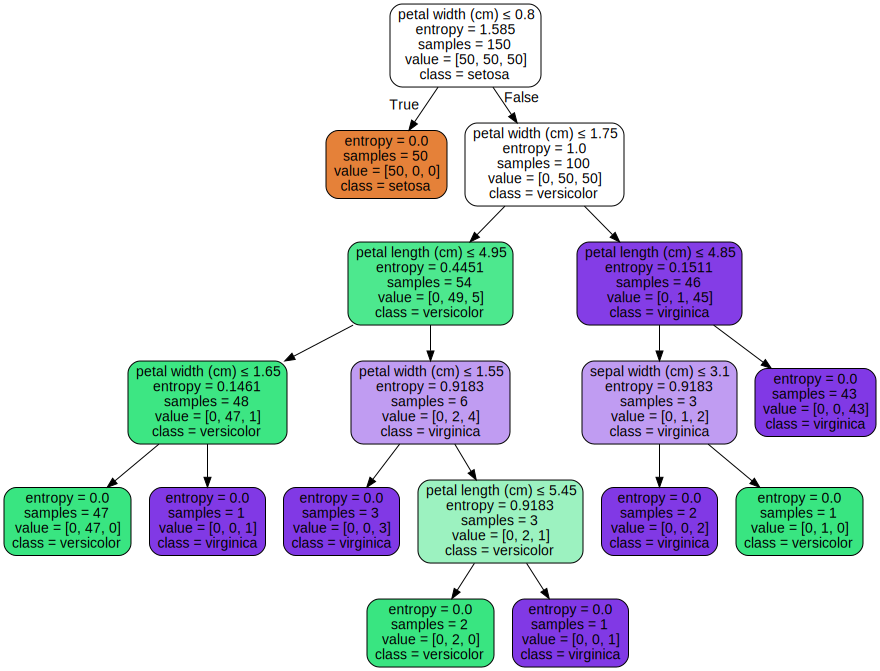

In [12]:
dot_data = tree.export_graphviz(clf01, out_file=None, 
                         feature_names=fname01,  
                         class_names=tname01,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 生成图片

In [13]:
np.info(tree.DecisionTreeClassifier)

 DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                        min_samples_split=2, min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0, max_features=None,
                        random_state=None, max_leaf_nodes=None,
                        min_impurity_split=1e-07, class_weight=None,
                        presort=False)

A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_features : int, float, string or None, optional (default=None)
    The number of features to consider when 

In [27]:
np.info(graphviz.Source)

 Source(source, filename=None, directory=None, format=None, engine=None,
        encoding=None)

Verbatim DOT source code string to be rendered by Graphviz.

Args:
    source: The verbatim DOT source code string.
    filename: Filename for saving the source (defaults to name + '.gv').
    directory: (Sub)directory for source saving and rendering.
    format: Rendering output format ('pdf', 'png', ...).
    engine: Layout command used ('dot', 'neato', ...).
    encoding: Encoding for saving the source.

.. note::
    All parameters except source are optional and can be changed under
    their corresponding attribute name after instance creation.


Methods:

  render  --  Save the source to file and render with the Graphviz engine.
  save  --  Save the DOT source to file.
  pipe  --  Return the source piped through the Graphviz layout command.
  view  --  Save the source to file, open the rendered result in a viewer.
